Titanic Survive Prediction

Importing Libraries and Load Data

In [985]:
# importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import warnings 
warnings.filterwarnings("ignore")

In [986]:
# importing datasets
titanic_train = pd.read_csv('C:\\Users\\ruiro\\OneDrive\\Ambiente de Trabalho\\Code\\train_titanic.csv', sep =';')
titanic_test = pd.read_csv('C:\\Users\\ruiro\\OneDrive\\Ambiente de Trabalho\\Code\\test_titanic.csv', sep =';')

Exploratory Data Analysis

In [987]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [988]:
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [989]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [990]:
# Checking the values for different columns
print(titanic_train.Survived.value_counts())
print(titanic_train.Pclass.value_counts())
print(titanic_train.Sex.value_counts())
print(titanic_train.SibSp.value_counts())
print(titanic_train.Parch.value_counts())
print(titanic_train.Embarked.value_counts())


Survived
0    549
1    342
Name: count, dtype: int64
Pclass
3    491
1    216
2    184
Name: count, dtype: int64
Sex
male      577
female    314
Name: count, dtype: int64
SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64
Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


In [991]:
# Checking the amount of missing data in each column
titanic_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [992]:
# Solving the problem of the missing data with replacing that values or drop the column
titanic_train.drop('Cabin', axis = 1, inplace = True)
titanic_train.Age.fillna(titanic_train.Age.mean(), inplace = True)
titanic_train.Embarked.fillna(titanic_train.Embarked.mode()[0], inplace = True)
titanic_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Encoding Labels

In [993]:
encoder = LabelEncoder()
titanic_train.Sex = encoder.fit_transform(titanic_train.Sex)
titanic_train.Embarked = encoder.fit_transform(titanic_train.Embarked)
print(titanic_train.Sex.value_counts())
print(titanic_train.Embarked.value_counts())

# grouping ages
bins = [0, 18, 35, 60, 100]
titanic_train.Age = pd.cut(titanic_train.Age, bins = bins, labels = [1,2,3,4])


Sex
1    577
0    314
Name: count, dtype: int64
Embarked
2    646
0    168
1     77
Name: count, dtype: int64


Changing the columns dtype

In [994]:
titanic_train.Sex = titanic_train.Sex.astype('category')
titanic_train.Embarked = titanic_train.Embarked.astype('category')
titanic_train.Pclass = titanic_train.Pclass.astype('category')
titanic_train.Age = titanic_train.Age.astype('category')
titanic_train.Survived = titanic_train.Survived.astype('category')
titanic_train.SibSp = titanic_train.SibSp.astype('category')
titanic_train.Parch = titanic_train.Parch.astype('category')

Dropping Irrelevant columns

In [995]:
titanic_train.drop(['Name', 'Ticket', 'PassengerId'], axis = 1, inplace = True)
print(titanic_train.describe())

             Fare
count  891.000000
mean    32.204208
std     49.693429
min      0.000000
25%      7.910400
50%     14.454200
75%     31.000000
max    512.329200


Correlation between columns

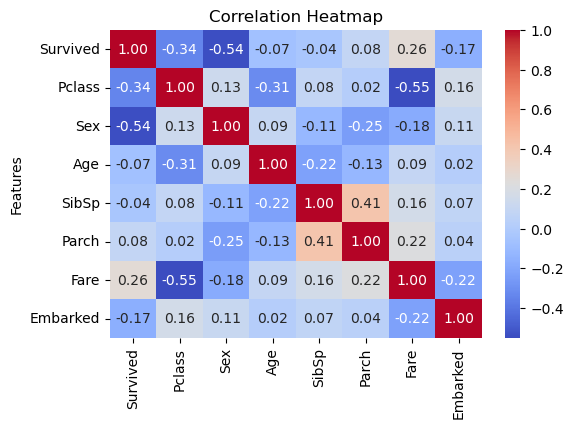

In [996]:
# Correlation between columns
correlation_matrix = titanic_train.corr()
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)

plt.title('Correlation Heatmap')
plt.ylabel('Features')
plt.show()

ML model

In [997]:
y = titanic_train.iloc[:,0]
x = titanic_train.drop(['Survived', 'SibSp'], axis = 1)
print(y.value_counts())

Survived
0    549
1    342
Name: count, dtype: int64


In [998]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state = 42)

In [999]:
# Decision Tree Classifier
dt = DecisionTreeClassifier( random_state = 42)
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
print(dt.score(x_test, y_test))
print(accuracy_score(y_test, y_pred))

0.8212290502793296
0.8212290502793296


In [1000]:
# Tunning the model with Grid Search
param_grid = {'max_depth': [3, 5, 10, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'criterion': ['gini', 'entropy']}
grid_search = GridSearchCV(estimator = dt, param_grid = param_grid, cv = 10, scoring = 'accuracy')
grid_search.fit(x_train, y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
0.8230046948356808


In [1001]:
best_model_dt = grid_search.best_estimator_
y_pred = best_model_dt.predict(x_test)

test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.8212290502793296


Random Forest Classifier

In [1002]:
rfc = RandomForestClassifier( random_state = 42)
x_train_rfc, x_test_rfc, y_train_rfc, y_test_rfc = train_test_split(x, y, test_size=0.2, random_state = 42)
rfc.fit(x_train_rfc, y_train_rfc)
y_pred_rfc = rfc.predict(x_test_rfc)
print(rfc.score(x_test_rfc, y_test_rfc))
print(accuracy_score(y_test_rfc, y_pred_rfc))

0.8435754189944135
0.8435754189944135


In [1003]:
# Tunning with the Grid Search
param_grid = {'max_depth': [3, 5, 10, None],'min_samples_split': [2, 5, 10, None],'min_samples_leaf': [1, 2, 4, None],'criterion': [ 'gini', 'entropy', None]}
grid_search_rfc = GridSearchCV(estimator = rfc, param_grid = param_grid, cv = 10, scoring = 'accuracy')
grid_search_rfc.fit(x_train, y_train)
print(grid_search_rfc.best_params_)
print(grid_search_rfc.best_score_)

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5}
0.8272104851330203


In [1004]:
best_model_rfc = grid_search_rfc.best_estimator_
y_pred = best_model_rfc.predict(x_test)

test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.8100558659217877


Treatment of the test population

In [1005]:
id = titanic_test.PassengerId 
titanic_test.drop(['Cabin', 'Ticket', 'Name', 'PassengerId', 'SibSp'], axis = 1, inplace = True)
titanic_test.Sex = encoder.fit_transform(titanic_test.Sex)
titanic_test.Embarked = encoder.fit_transform(titanic_test.Embarked)
titanic_test.Age.fillna(titanic_test.Age.mean(), inplace = True)
titanic_test.Fare.fillna(titanic_test.Fare.mean(), inplace = True)
titanic_test.Age = pd.cut(titanic_test.Age, bins = bins, labels = [1,2,3,4])
titanic_test.Sex = titanic_test.Sex.astype('category')
titanic_test.Embarked = titanic_test.Embarked.astype('category')
titanic_test.Pclass = titanic_test.Pclass.astype('category')
titanic_test.Age = titanic_test.Age.astype('category')
titanic_test.Parch = titanic_test.Parch.astype('category')
print(titanic_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Pclass    418 non-null    category
 1   Sex       418 non-null    category
 2   Age       418 non-null    category
 3   Parch     418 non-null    category
 4   Fare      418 non-null    float64 
 5   Embarked  418 non-null    category
dtypes: category(5), float64(1)
memory usage: 6.3 KB
None


Testing the model on test population ans saving into a dataset

In [1008]:
X_test = titanic_test
Y_pred = rfc.predict(X_test)


In [1007]:
predictions = pd.DataFrame({'PassengerId': id,'Survived': Y_pred})
print(predictions)


     PassengerId  Survived
0            892         0
1            893         1
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]
